In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle


import matplotlib.pyplot as plt

%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 20 days


## Load dataset and prepare train/test splits

The data set comes from https://www.kaggle.com/dalpozz/creditcardfraud

In [2]:
df = pd.read_csv("../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = np.array(df.filter(regex="V.*"))
y = np.array(df.Class)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

## Helper functions

In [5]:
## plotting precision recall curves wrapper

def plot_precision_recall_curve(y_test, y_score, title = ""):
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title)

In [12]:
def eval_classifier(clf):
    avg_precisions = cross_val_score(clf, X, y, scoring = 'average_precision', cv = 5, n_jobs=-2)
    roc_aucs = cross_val_score(clf, X, y, scoring = 'roc_auc', cv = 5, n_jobs=-2)
    
    print "the average precisoin", np.mean(avg_precisions ), "±", np.std(avg_precisions)
    print "the average auc", np.mean(roc_aucs), "±", np.std(roc_aucs)
    

    clf.fit(X_train, y_train)
    y_scores = clf.predict_proba(X_test)[:,1]

    AUC = roc_auc_score(y_test, y_scores)
    avg_prec = average_precision_score(y_test, y_scores)

    plot_precision_recall_curve(y_test, LR.predict_proba(X_test)[:,1], 
                                "Logistic Regression Baseline \n AUC: {0:0.4f}".format(AUC) 
                                + "\nAverage Precision: {0:0.4f}".format(avg_prec))

##Logistic regression baseline

In [6]:
np.random.seed(1)

LR = LogisticRegressionCV(cv = 3, n_jobs=1)
avg_precisions = cross_val_score(LR, X, y, scoring = 'average_precision', cv = 5, n_jobs=-2)
roc_aucs = cross_val_score(LR, X, y, scoring = 'roc_auc', cv = 5, n_jobs=-2)

print "the average precisoin", np.mean(avg_precisions ), "±", np.std(avg_precisions)
print "the average auc", np.mean(roc_aucs), "±", np.std(roc_aucs)

the average precisoin 0.747259806666 ± 0.094272484125
the average auc 0.975573856367 ± 0.00574205101924


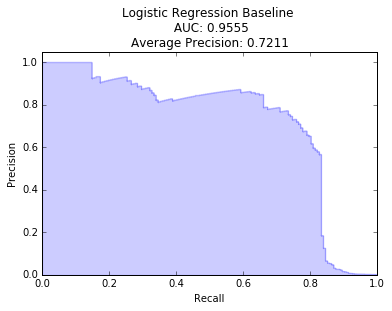

In [7]:
LR = LogisticRegressionCV(cv = 10, n_jobs=-2)
LR.fit(X_train, y_train)
y_scores = LR.predict_proba(X_test)[:,1]

AUC = roc_auc_score(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)

plot_precision_recall_curve(y_test, LR.predict_proba(X_test)[:,1], 
                            "Logistic Regression Baseline \n AUC: {0:0.4f}".format(AUC) 
                            + "\nAverage Precision: {0:0.4f}".format(avg_prec))

## Logistic regression "balanced" class weighted 

In [8]:
np.random.seed(1)

LR = LogisticRegressionCV(class_weight="balanced", cv = 3, n_jobs=1)
avg_precisions = cross_val_score(LR, X, y, scoring = 'average_precision', cv = 5, n_jobs=-2)
roc_aucs = cross_val_score(LR, X, y, scoring = 'roc_auc', cv = 5, n_jobs=-2)

print "the average precisoin", np.mean(avg_precisions ), "±", np.std(avg_precisions)
print "the average auc", np.mean(roc_aucs), "±", np.std(roc_aucs)

the average precisoin 0.720273251267 ± 0.0800665753135
the average auc 0.977811472741 ± 0.0138816799357


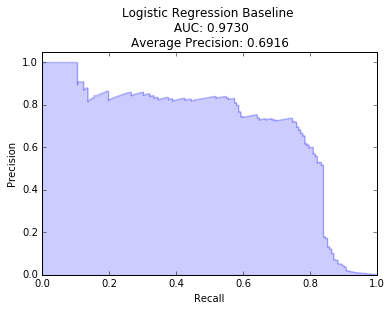

In [9]:
LR = LogisticRegressionCV(class_weight="balanced", n_jobs=-2, cv = 5)
LR.fit(X_train, y_train)
y_scores = LR.predict_proba(X_test)[:,1]

AUC = roc_auc_score(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)

plot_precision_recall_curve(y_test, LR.predict_proba(X_test)[:,1], 
                            "Logistic Regression Baseline \n AUC: {0:0.4f}".format(AUC) 
                            + "\nAverage Precision: {0:0.4f}".format(avg_prec))

## Random Forests baseline

In [10]:
np.random.seed(1)

RF =  RandomForestClassifier(n_estimators=100, n_jobs=-2)
avg_precisions = cross_val_score(RF, X, y, scoring = 'average_precision', cv = 5, n_jobs=-2)
roc_aucs = cross_val_score(RF, X, y, scoring = 'roc_auc', cv = 5, n_jobs=-2)

print "the average precisoin", np.mean(avg_precisions ), "±", np.std(avg_precisions)
print "the average auc", np.mean(roc_aucs), "±", np.std(roc_aucs)

the average precisoin 0.799192872754 ± 0.0794711651625
the average auc 0.949736516589 ± 0.0243733106558


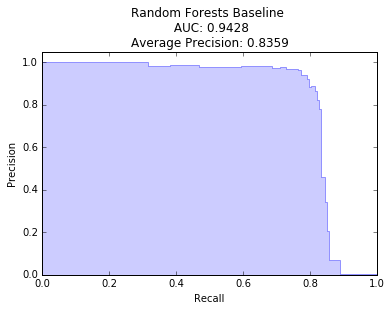

In [11]:
RF =  RandomForestClassifier(n_estimators=100, n_jobs=-2)
RF.fit(X_train, y_train)
y_scores = RF.predict_proba(X_test)[:,1]


AUC = roc_auc_score(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)

plot_precision_recall_curve(y_test, RF.predict_proba(X_test)[:,1], 
                            "Random Forests Baseline \n AUC: {0:0.4f}".format(AUC) 
                            + "\nAverage Precision: {0:0.4f}".format(avg_prec))

the average precisoin 0.781848726876 ± 0.0840837739921
the average auc 0.945962911258 ± 0.019316516351


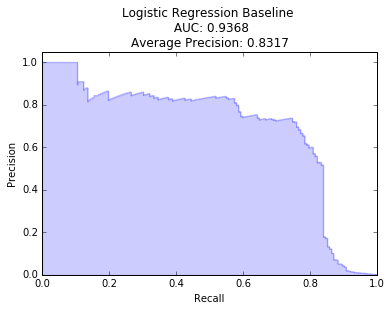

In [14]:
eval_classifier(RandomForestClassifier(n_estimators=100, n_jobs=-2, class_weight="balanced"))

## Naive over sampling and undersampling

In [5]:
def classifier_avg_precision(clf, X_pos, X_neg):
    X_augmented = np.vstack((X_pos, X_neg))
    y_augmented = np.hstack((np.ones(X_pos.shape[0]), np.zeros(X_neg.shape[0])))
    X_augmented, y_augmented = shuffle(X_augmented, y_augmented, random_state = 0)
    avg_precisions = cross_val_score(clf, X_augmented, y_augmented, scoring = 'average_precision', cv = 5, n_jobs=-2)
    #roc_aucs = cross_val_score(clf, X, y, scoring = 'roc_auc', cv = 5, n_jobs=-2)
    
    return np.mean(avg_precisions ), np.std(avg_precisions)

In [6]:
X_train_neg = X_train[y_train == 0]
X_train_pos = X_train[y_train == 1]

print "Num neg examples", X_train_neg.shape[0]
print "Num pos examples", X_train_pos.shape[0]

Num neg examples 190490
Num pos examples 330


In [7]:
def sample_rows(A, sample_factor, replace_samples = False):
    indx = np.random.choice(A.shape[0], 
                            size = int(A.shape[0]*sample_factor), 
                            replace=replace_samples)

    A = A[indx,:]
    return A

In [10]:
avg_precisions_over_sample_fixed = []
std_precisions_over_sample_fixed = []

under_sample_factors = np.logspace(-3,0,20)

for under_sample_factor in under_sample_factors:
    X_train_neg_under = sample_rows(X_train_neg, sample_factor = under_sample_factor, replace_samples=False)
    X_train_pos_over = sample_rows(X_train_pos, sample_factor = 1, replace_samples=True)
    
    avg_p, std_p = classifier_avg_precision(RandomForestClassifier(n_estimators=100, n_jobs=-2), 
                                            X_train_pos_over, X_train_neg_under)
    avg_precisions_over_sample_fixed.append(avg_p)
    std_precisions_over_sample_fixed.append(std_p)

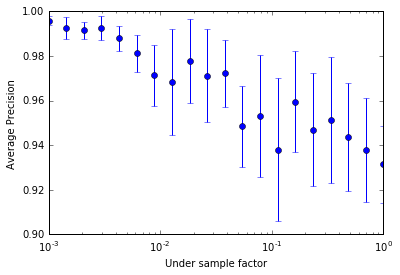

In [11]:
plt.errorbar(under_sample_factors, avg_precisions_over_sample_fixed, yerr= np.array(std_precisions_over_sample_fixed), 
             fmt = 'o')
plt.semilogx()
plt.xlabel("Under sample factor")
plt.ylabel("Average Precision")


In [37]:
meh = np.hstack((np.ones(X_train_pos_over.shape[0]), np.zeros(X_train_neg_under.shape[0])))

In [38]:
meh.shape

(22349,)

In [ ]:
neg_indx = np.random.choice(X_train_neg.shape[0], 
                            size = int(X_train_neg.shape[0]*.1), 
                            replace=False)

X_train_neg_under = X_train_neg[neg_indx,:]
print "Num neg examples under sampled", X_train_neg_under.shape[0]

In [ ]:
from scipy.stats import normaltest
p_vals = normaltest(X_train_pos, axis = 0).pvalue

In [ ]:
p_thresh = 1e-20
X_train_pos[:, p_vals<p_thresh].shape

In [ ]:
np.random.seed(42)
indx = np.random.randint(X_train_pos.shape[0], size=X_train_pos.shape[0]*100)

In [ ]:
X_synth = X_train_pos[indx,:].copy()


In [ ]:
num_rows, num_cols = X_synth[:, p_vals<p_thresh].shape
X_synth[:,p_vals<p_thresh] = X_synth[:, p_vals<p_thresh] + 0.01*np.random.randn(num_rows, num_cols)

In [ ]:
X_train_pos_aug = np.vstack((X_synth, X_train_pos))

In [ ]:
X_train_aug = np.vstack((X_train_pos_aug, X_train_neg))

In [ ]:
y_train_aug = np.hstack((np.ones(X_train_pos_aug.shape[0]), np.zeros(X_train_neg.shape[0])))

In [ ]:
LR = LogisticRegressionCV()

In [ ]:
np.random.shuffle(y_train_aug)

In [ ]:
LR.fit(X_train_aug, y_train_aug)

In [ ]:
LR.fit(X_train_aug, y_train_aug)
roc_auc_score(y_test, LR.predict_proba(X_test)[:,0])

In [ ]:
f1_score(y_test, LR.predict(X_test))

In [ ]:
from scikitplot import classifier_factory

In [ ]:
classifier_factory(LR)

In [ ]:
LR.plot_precision_recall_curve(X_test, y_test)

In [ ]:
?LR.plot_precision_recall_curve

In [ ]:
LR.plot_roc_curve(X_test, y_test)

In [ ]:
LR.plot_ks_statistic(X_test, y_test)

In [ ]:
import scikitplot.plotters as skplt
%matplotlib inline

In [ ]:
res = skplt.precision_recall_curve(y_test, LR.predict_proba(X_test)[:,1])


In [ ]:
plt.plot(res[0], res[1])

In [ ]:
y_test.shape

In [ ]:
LR.predict(X_test)

In [ ]:
y_test.shape